# Telecom Churn 

 ## Business Overview
 
>In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.


### Understanding and Defining Churn
>There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

>In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

>However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

### Definitions of Churn

There are various ways to define churn, such as:

- Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

>The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

- Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. The **`good phase`**: In this phase, the customer is happy with the service and behaves as usual.


2. The **`action phase`**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)


3. The **`churn phase`**: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

**Importing all the necessary packages**

In [1]:
#suppressing the warnings

import warnings
warnings.filterwarnings('ignore') #this code ignores all the deprication and other warnings

In [2]:
#importing necesary libraries

import numpy as np #numerical python library
import pandas as pd # data analysis library
import matplotlib.pyplot as plt #visualizing library
import seaborn as sns #visualizing library

sns.set_style("whitegrid") #setting background as whitegrid, basically white color
%matplotlib inline

In [3]:
#importing the dataset

churn = pd.read_csv('telecom_churn_data.csv') #reading dataset from the local directory
churn.head() #displays the top 5 rows of the resulting dataframe

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#checking the shape of the dataframe
churn.shape

(99999, 226)

In [5]:
#info on dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#describe
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
#Finding unique mobile numbers

churn['mobile_number'].unique().all() # Checking the number of unique entries in mobile_number column

True

We can remove mobile number column as all the numbers are unique, but we can keep them to identify who has churned after perfroming analysis.

In [8]:
# Circle ID

churn['circle_id'].nunique() # Since circle_id is the same for all the mobile numbers, we can remove the column

1

### Finding High Value Customers

Define high-value customers as follows: Those who have recharged with an amount more than or equal to `X`, where `X` is the 70th percentile of the `average recharge amount` in the first two months (the good phase).

As per data dictionary, the reacharge amount is given by the keyword RECH, we shall find all the columns associated with RECH

In [9]:
# Creating a copy dataframe to work

df = churn.copy()

### Data Recharges

In [10]:
data = [col for col in churn.columns if ('data') in col] #finding columns containing 'data' in the column name
print(data)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [11]:
Data_2G = [col for col in churn.columns if '2g' in col] # finding columns containing '2g' in the column name
print(Data_2G)

['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9']


In [12]:
Data_3G = [col for col in churn.columns if '3g' in col] # finding columns containing '3g' in the column name
print(Data_3G)

['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']


In [13]:
print(df['count_rech_2g_6']) # Number of 2g data recharges made
print('*'*80)
print(df['count_rech_3g_6']) # Number of 3g data recharges made

0        0.0
1        NaN
2        NaN
3        NaN
4        1.0
        ... 
99994    NaN
99995    NaN
99996    2.0
99997    1.0
99998    1.0
Name: count_rech_2g_6, Length: 99999, dtype: float64
********************************************************************************
0        1.0
1        NaN
2        NaN
3        NaN
4        0.0
        ... 
99994    NaN
99995    NaN
99996    0.0
99997    2.0
99998    0.0
Name: count_rech_3g_6, Length: 99999, dtype: float64


In [14]:
df['total_rech_data_6']

0        1.0
1        NaN
2        NaN
3        NaN
4        1.0
        ... 
99994    NaN
99995    NaN
99996    2.0
99997    3.0
99998    1.0
Name: total_rech_data_6, Length: 99999, dtype: float64

In [15]:
df['total_rech_data_8'].corr(df['count_rech_2g_8']+df['count_rech_3g_8'])

1.0

Inference: `df['total_rech_data_i]` = `df['count_rech_2g_i']`+`df['count_rech_3g_i']` where i is from 6 to 8 denoting months

**We have average amount of data recharges and the count of data recharges done, hence we can find out total number of data recharges made**

`Total` = **`number of recharges made`** * **`amount spent for individual recharges`**

**Creating new columns**

In [16]:
for i in range(6,10):
    df['total_data_rech_amt_'+str(i)] = round(df['total_rech_data_'+str(i)] * df['av_rech_amt_data_'+str(i)])

In [17]:
# Imputing null values with 0 - indicating no recharge was made
for i in range(6,10):
    df['total_data_rech_amt_'+str(i)] = df['total_data_rech_amt_'+str(i)].fillna(0)

In [18]:
# Checking the null value count after imputing with 0
for i in range(6,10):
    print(df['total_data_rech_amt_'+str(i)].isnull().any())

False
False
False
False


In [19]:
df.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis=1,inplace = True)

### Voice Recharges

In [20]:
recharge = [col for col in churn.columns if ('total_rech') in col]
print(recharge)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


Total recharge amount done are already provided, we shall add total amount recharged for voice and data respectively

In [21]:
for i in range(6,10):
    df['total_amt_reched_'+str(i)] = df['total_rech_amt_'+str(i)]+ df['total_data_rech_amt_'+str(i)]

In [22]:
# Checking if any 'NAN' value in the total amount spent for recharging
for i in range(6,10):
    print(df['total_amt_reched_'+str(i)].isnull().any())

False
False
False
False


In [23]:
df['total_amt_reched_9']

0           0.0
1         121.0
2         404.0
3         410.0
4         200.0
          ...  
99994      50.0
99995      30.0
99996       0.0
99997    4310.0
99998       0.0
Name: total_amt_reched_9, Length: 99999, dtype: float64

We have to check the 70th percentile of the average amount of recharges done in month 6 and month 7

In [24]:
avg = (df['total_amt_reched_6']+df['total_amt_reched_7'])/2

In [25]:
avg.describe(percentiles = [0.25,0.5,0.7,0.75,0.90])

count    99999.000000
mean       485.328088
std        869.423709
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
90%       1028.000000
max      61236.000000
dtype: float64

The 70th percentile value is **`478`**

In [26]:
# Taking only the high value customers
df = df[avg >= 478]

In [27]:
#Finding out shape of High Value Customers
df.shape

(30001, 228)

### Tagging Churners

As per the requirement we are supposed to tag if a user has churned or not using the below columns containing 9th month (churn month) data

In [28]:
#If the sum is 0 (if all the column entries are 0) then it is a `churn`(1) if not it is `not churn`(0)
df['churn'] = np.where(df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0,1,0)

In [29]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0


### Amount of Churners in dataset

In [30]:
non_churners = (len(df[df['churn']==0])/len(df))*100
print('Non Churn Customers are:',non_churners)

Non Churn Customers are: 91.86360454651512


In [31]:
churners = len(df[df['churn']==1])/len(df)*100
print('Churn Customers are:',churners)

Churn Customers are: 8.136395453484884


**Removing all the columns of the last month i.e '_9**

In [32]:
colu = [col for col in df.columns if '_9' in col]
colu

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [33]:
# Dropping all the 9th month columns
df.drop(colu, axis=1, inplace = True)
print(df.shape)

(30001, 173)


In [34]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_amt_reched_6,total_amt_reched_7,total_amt_reched_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,910.65,122.16,0.00,0.0,354.0,207.0,437.0,955.0,327.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,0.00,0.00,0.00,0.0,0.0,0.0,600.0,680.0,718.0,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,51.86,0.00,0.00,0.0,712.0,540.0,0.0,1166.0,979.0,0


In [35]:
#Finding out the unique valued columns
def isunique(data,n):
    col = data.nunique()
    return col[col <=n].index

In [36]:
temp = isunique(df,1).to_list()

In [37]:
#Unique valued columns
temp

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [38]:
df.drop(temp, axis=1, inplace = True) #dropping unique valued columns

In [39]:
df.shape

(30001, 160)

## Exploring the variables

**Let us explore Date columns in the given dataset**

In [40]:
date = [col for col in df.columns if 'date' in col] #extracting only the columns containing keyword 'date'
date

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [41]:
df[date].info() #Getting the basic info about date columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_6       29928 non-null  object
 1   date_of_last_rech_7       29903 non-null  object
 2   date_of_last_rech_8       29418 non-null  object
 3   date_of_last_rech_data_6  16756 non-null  object
 4   date_of_last_rech_data_7  17057 non-null  object
 5   date_of_last_rech_data_8  15953 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [42]:
df[date].isnull().sum() #checking the null value count

date_of_last_rech_6            73
date_of_last_rech_7            98
date_of_last_rech_8           583
date_of_last_rech_data_6    13245
date_of_last_rech_data_7    12944
date_of_last_rech_data_8    14048
dtype: int64

We do not see the need of using dates in the analysis, we shall drop all the date columns

In [43]:
df.drop(columns=date, axis=1, inplace = True)

In [44]:
df.shape

(30001, 154)

### Handling 0's in the dataset

In [45]:
df = df.fillna(0) # Let us fill all the NaN values with 0

In [46]:
#Checking if there are any complete 0's in any of the columns
zero = df.columns[(df == 0).all()]
print('There are {} features with 0 values and the columns are \n{}'.format(len(zero), zero))

There are 0 features with 0 values and the columns are 
Index([], dtype='object')


In [47]:
#Let us choose to remove all the above columns with 0 values as they are not going to add any importance to analysis
df.drop(columns = zero, axis = 1, inplace = True)
print(df.shape)

(30001, 154)


In [48]:
df.isnull().any(axis = 1).sum() # There are no null values in the dataset

0

### Creating new features from the existing features

All the below features are calculated by taking the average of the `good phase` months and calculating the difference with `action` phase

In [49]:
df['arpu_diff']=((df['arpu_6']+df['arpu_7'])/2)-df['arpu_8']

In [50]:
df['loc_og_mou_df']=((df['loc_og_mou_6']+df['loc_og_mou_7'])/2)-df['loc_og_mou_8']

In [51]:
df['loc_ic_mou_diff']=((df['loc_ic_mou_6']+df['loc_ic_mou_7'])/2)-df['loc_ic_mou_8']

In [52]:
df['onnet_mou_diff']=((df['onnet_mou_6']+df['onnet_mou_7'])/2)-df['onnet_mou_8']

In [53]:
df['offnet_mou_diff']=((df['offnet_mou_6']+df['offnet_mou_7'])/2)-df['offnet_mou_8']

In [54]:
df['vol_2g_mb_diff']=((df['vol_2g_mb_6']+df['vol_2g_mb_7'])/2)-df['vol_2g_mb_8']

In [55]:
df['vol_3g_mb_diff']=((df['vol_3g_mb_6']+df['vol_3g_mb_7'])/2)-df['vol_3g_mb_8']

In [56]:
df['arpu_3g_diff']=((df['arpu_3g_6']+df['arpu_3g_7'])/2)-df['arpu_3g_8']

In [57]:
df['night_pck_user_diff']=((df['night_pck_user_6']+df['night_pck_user_7'])/2)-df['night_pck_user_8']

In [58]:
df['max_rech_data_diff']=((df['max_rech_data_6']+df['max_rech_data_7'])/2)-df['max_rech_data_8']

In [59]:
df['max_rech_amt_diff']=((df['max_rech_amt_6']+df['max_rech_amt_7'])/2)-df['max_rech_amt_8']

In [60]:
df['total_rech_amt_diff']=((df['total_rech_amt_6']+df['total_rech_amt_7'])/2)-df['total_rech_amt_8']

In [61]:
df['total_og_mou_diff']=((df['total_og_mou_6']+df['total_og_mou_7'])/2)-df['total_og_mou_8']

In [62]:
df['total_ic_mou_diff']=((df['total_ic_mou_6']+df['total_ic_mou_7'])/2)-df['total_ic_mou_8']

In [63]:
df['roam_ic_mou_diff']=((df['roam_ic_mou_6']+df['roam_ic_mou_7'])/2)-df['roam_ic_mou_8']

In [64]:
df['roam_og_mou_diff']=((df['roam_og_mou_6']+df['roam_og_mou_7'])/2)-df['roam_og_mou_8']

In [65]:
df['monthly_2g_diff']=((df['monthly_2g_6']+df['monthly_2g_7'])/2)-df['monthly_2g_8']

In [66]:
df['monthly_3g_diff']=((df['monthly_3g_6']+df['monthly_3g_7'])/2)-df['monthly_3g_8']

In [67]:
df['fb_user_diff']=((df['fb_user_6']+df['fb_user_7'])/2)-df['fb_user_8']

In [68]:
df['loc_og_t2t_mou_diff']=((df['loc_og_t2t_mou_6']+df['loc_og_t2t_mou_7'])/2)-df['loc_og_t2t_mou_8']

In [69]:
df['loc_og_t2m_mou_diff']=((df['loc_og_t2m_mou_6']+df['loc_og_t2m_mou_7'])/2)-df['loc_og_t2m_mou_8']

In [70]:
df['loc_ic_mou_diff']=((df['loc_ic_mou_6']+df['loc_ic_mou_7'])/2)-df['loc_ic_mou_8']

In [71]:
df['fb_user_diff']=((df['fb_user_6']+df['fb_user_7'])/2)-df['fb_user_8']

In [72]:
df['loc_ic_t2m_mou_diff']=((df['loc_ic_t2m_mou_6']+df['loc_ic_t2m_mou_7'])/2)-df['loc_ic_t2m_mou_8']

In [73]:
df['std_og_mou_diff']=((df['std_og_mou_6']+df['std_og_mou_7'])/2)-df['std_og_mou_8']

In [74]:
df['loc_og_mou_diff']=((df['loc_og_mou_6']+df['loc_og_mou_7'])/2)-df['loc_og_mou_8']

In [75]:
df.shape

(30001, 178)

In [76]:
df_last = df.copy()

## EDA

In [77]:
# How many actually Churned?
df['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

only `2441` have churned after considering High Value Customers

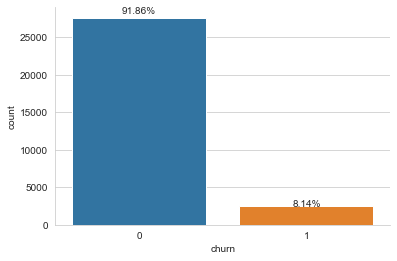

In [78]:
# Plotting the churn-non churn graph

res = sns.countplot(df['churn'])
res.spines['top'].set_visible(False)
res.spines['right'].set_visible(False)

for p in res.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    res.annotate(f'{height/len(df):.2%}', (x + width/2, y + height*1.02), ha='center')

<br> From the above plot, we can infer that there are only **`8.14%`** of churners </br>

### Aon - Age on network

In [79]:
a = [col for col in df.columns if 'aon' in col]
a

['aon']

In [80]:
df['aon'].describe()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

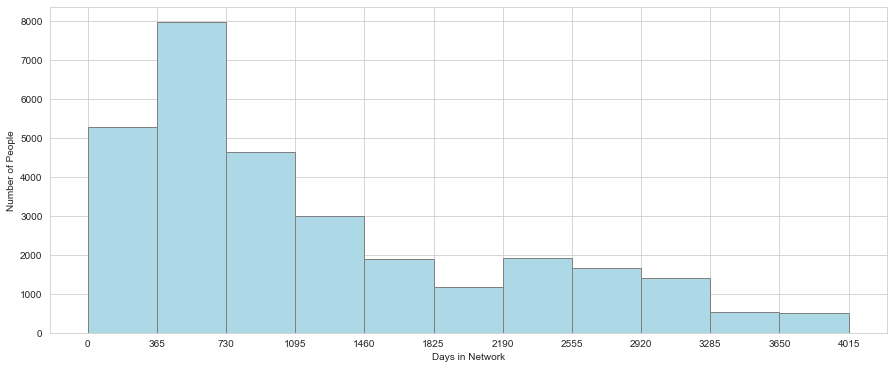

In [81]:
# Plotting count of people in the network

plt.figure(figsize = (15,6))
plt.hist(df['aon'], bins= range(0,df['aon'].max(),round(365)), facecolor = 'lightblue', edgecolor='grey')
plt.xticks(range(0,df['aon'].max(),round(365)))
plt.xlabel('Days in Network')
plt.ylabel('Number of People')

plt.show()

In [82]:
bins = [0,365,730,1095,1460,1825,2190,2920,3285,3650,4015] #binning according to number of days in year (cumulative)
temp = pd.cut(df['aon'],bins)
temp.head()

0     (730, 1095]
7     (730, 1095]
8        (0, 365]
21     (365, 730]
23     (365, 730]
Name: aon, dtype: category
Categories (10, interval[int64]): [(0, 365] < (365, 730] < (730, 1095] < (1095, 1460] ... (2190, 2920] < (2920, 3285] < (3285, 3650] < (3650, 4015]]

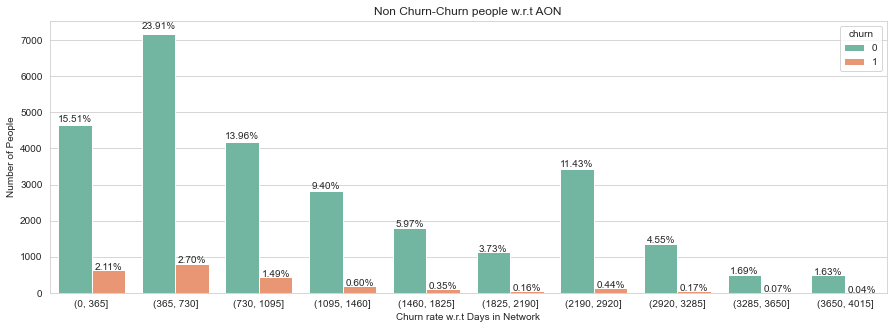

In [83]:
# Plotting the user behavior

plt.figure(figsize=(15,5))
res =sns.countplot(temp, hue = df['churn'],palette="Set2")
plt.xlabel('Churn rate w.r.t Days in Network')
plt.ylabel('Number of People')
plt.title('Non Churn-Churn people w.r.t AON')

for p in res.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    res.annotate(f'{height/len(temp):.2%}', (x + width/2, y + height*1.02), ha='center')

Most customers churn after 1 year of usage, **`2.7%`** and interestingly **`2.11%`** of the customers churn within a year of subsription

### ARPU - Average Revenue per User

In [84]:
cols = [col for col in df.columns if 'arpu' in col]
cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_diff',
 'arpu_3g_diff']

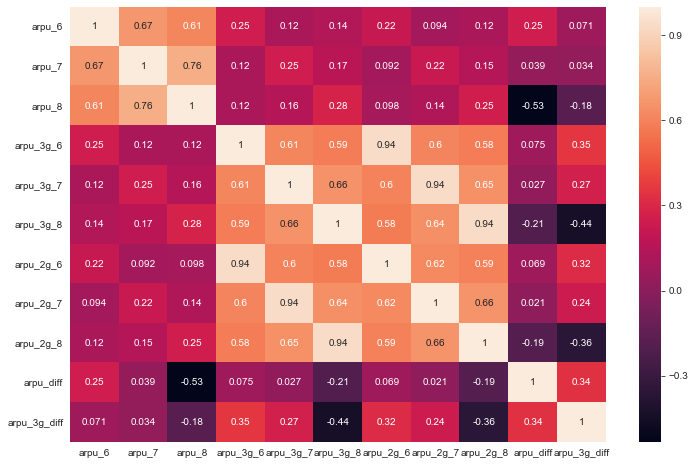

In [85]:
plt.figure(figsize=(12,8))

sns.heatmap(df[cols].corr(), annot = True)
plt.show()

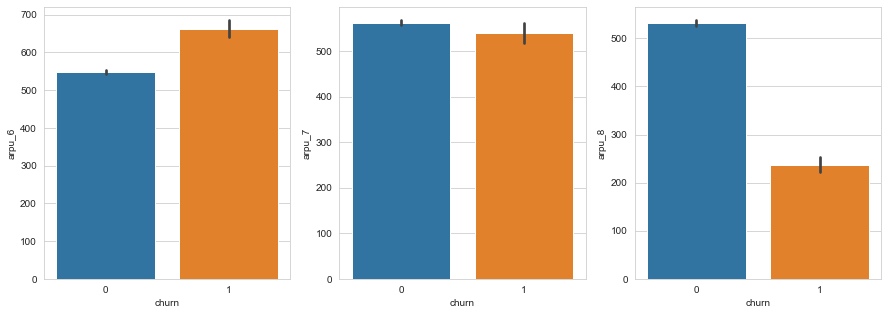

In [86]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x='churn',y='arpu_6',data=df)
plt.subplot(1,3,2)
sns.barplot(x='churn',y='arpu_7',data=df)
plt.subplot(1,3,3)
sns.barplot(x='churn',y='arpu_8',data=df)

plt.show()

Revenue of churners decreases rapidly in action phase

In [87]:
cols = [col for col in df.columns if 'loc_ic' in col]
cols

['loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_mou_diff',
 'loc_ic_t2m_mou_diff']

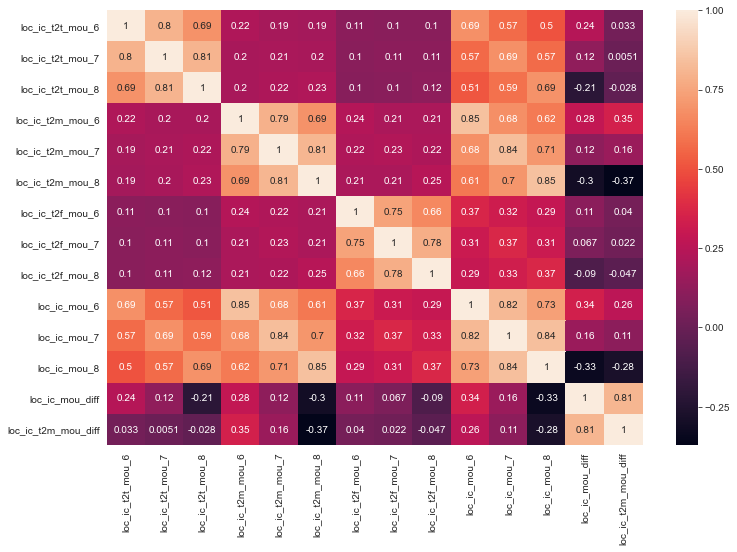

In [88]:
plt.figure(figsize = (12,8))
sns.heatmap(df[cols].corr(), annot = True)

### Incoming Call to Churn

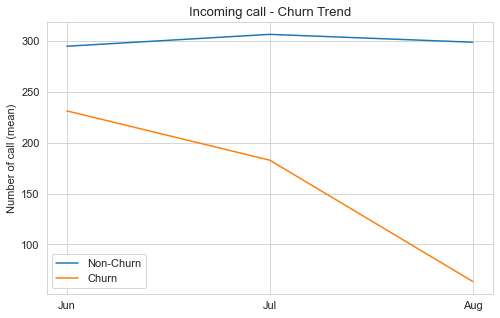

In [89]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 11

cols = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.ylabel('Number of call (mean)')
plt.title('Incoming call - Churn Trend')
plt.show()

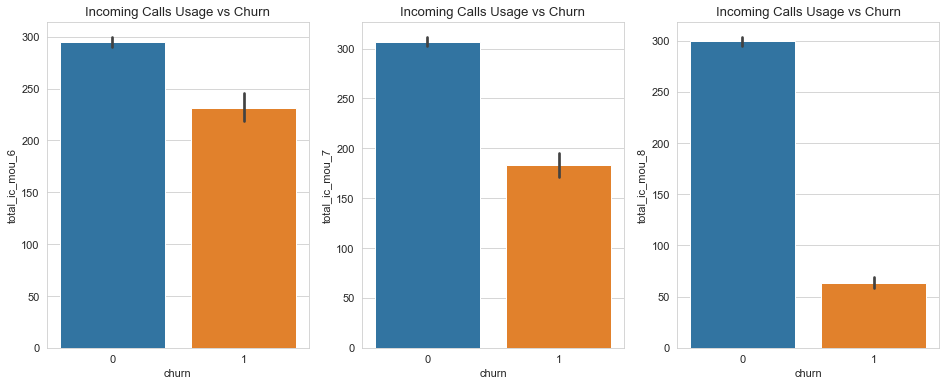

In [90]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.barplot(x = 'churn', y = 'total_ic_mou_6', data = df)
plt.title("Incoming Calls Usage vs Churn")
plt.subplot(1,3,2)
sns.barplot(x = 'churn', y = 'total_ic_mou_7', data = df)
plt.title("Incoming Calls Usage vs Churn")
plt.subplot(1,3,3)
sns.barplot(x = 'churn', y = 'total_ic_mou_8', data = df)
plt.title("Incoming Calls Usage vs Churn")
plt.show()

Trend drops drastically from good phase to action phase

### Outgoing call to Churn

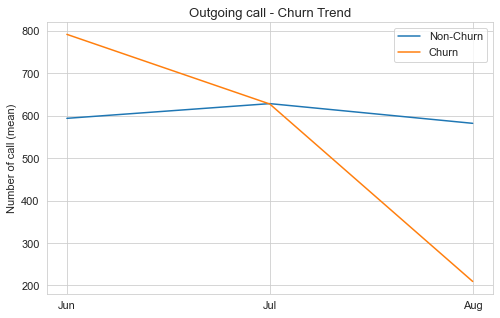

In [91]:
cols = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.ylabel('Number of call (mean)')
plt.title('Outgoing call - Churn Trend')
plt.show()

More Outgoing calls are made by churners and the trend drops downhill

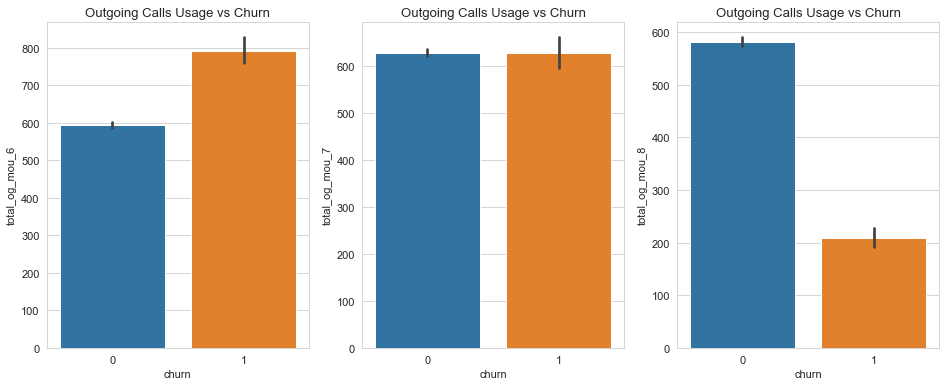

In [92]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.barplot(x = 'churn', y = 'total_og_mou_6', data = df)
plt.title("Outgoing Calls Usage vs Churn")
plt.subplot(1,3,2)
sns.barplot(x = 'churn', y = 'total_og_mou_7', data = df)
plt.title("Outgoing Calls Usage vs Churn")
plt.subplot(1,3,3)
sns.barplot(x = 'churn', y = 'total_og_mou_8', data = df)
plt.title("Outgoing Calls Usage vs Churn")
plt.show()

### Onnet

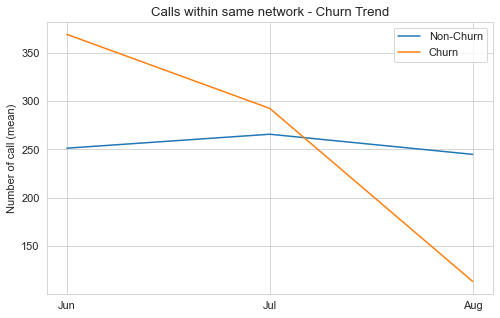

In [93]:
cols = ['onnet_mou_6','onnet_mou_7','onnet_mou_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.ylabel('Number of call (mean)')
plt.title('Calls within same network - Churn Trend')
plt.show()

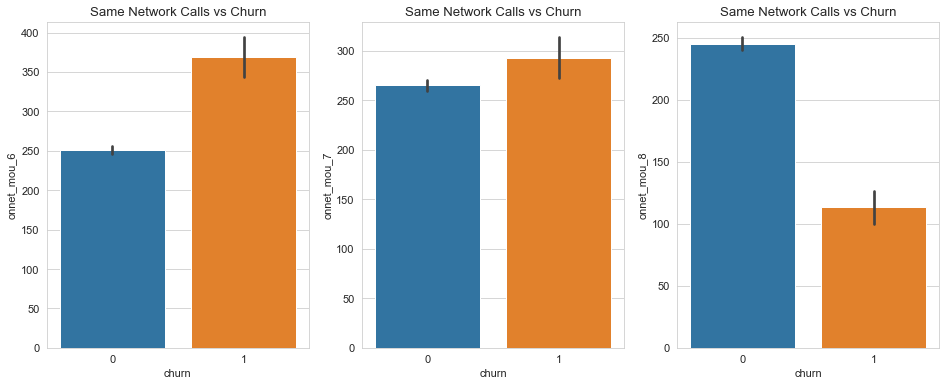

In [94]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.barplot(x = 'churn', y = 'onnet_mou_6', data = df)
plt.title("Same Network Calls vs Churn")
plt.subplot(1,3,2)
sns.barplot(x = 'churn', y = 'onnet_mou_7', data = df)
plt.title("Same Network Calls vs Churn")
plt.subplot(1,3,3)
sns.barplot(x = 'churn', y = 'onnet_mou_8', data = df)
plt.title("Same Network Calls vs Churn")
plt.show()

### Offnet calls

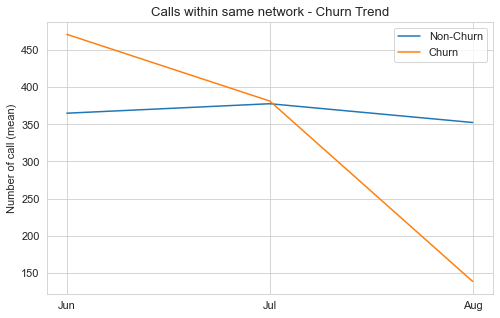

In [95]:
cols = ['offnet_mou_6','offnet_mou_7','offnet_mou_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.ylabel('Number of call (mean)')
plt.title('Calls within same network - Churn Trend')
plt.show()

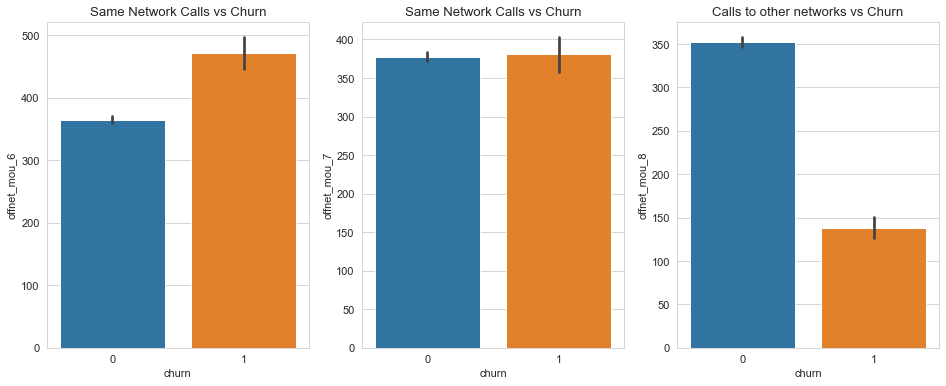

In [96]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.barplot(x = 'churn', y = 'offnet_mou_6', data = df)
plt.title("Same Network Calls vs Churn")
plt.subplot(1,3,2)
sns.barplot(x = 'churn', y = 'offnet_mou_7', data = df)
plt.title("Same Network Calls vs Churn")
plt.subplot(1,3,3)
sns.barplot(x = 'churn', y = 'offnet_mou_8', data = df)
plt.title("Calls to other networks vs Churn")
plt.show()

More calls are made to other network by churners in the good phase and it drops drastically in action phase

<br>

### Average Revenue per user - 3G

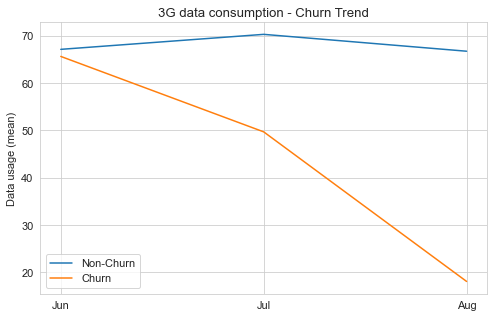

In [97]:
cols = ['arpu_3g_6','arpu_3g_7','arpu_3g_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.ylabel('Data usage (mean)')
plt.title('3G data consumption - Churn Trend')
plt.show()

### Standard Outgoing Calls

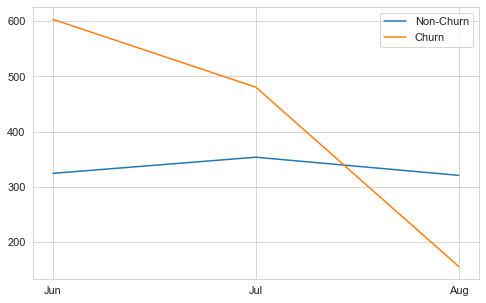

In [98]:
cols = ['std_og_mou_6','std_og_mou_7','std_og_mou_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.show()

### Standard Incoming Call

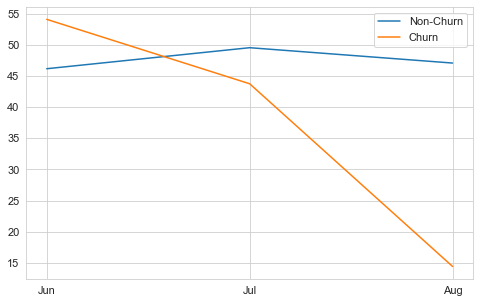

In [99]:
cols = ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.show()

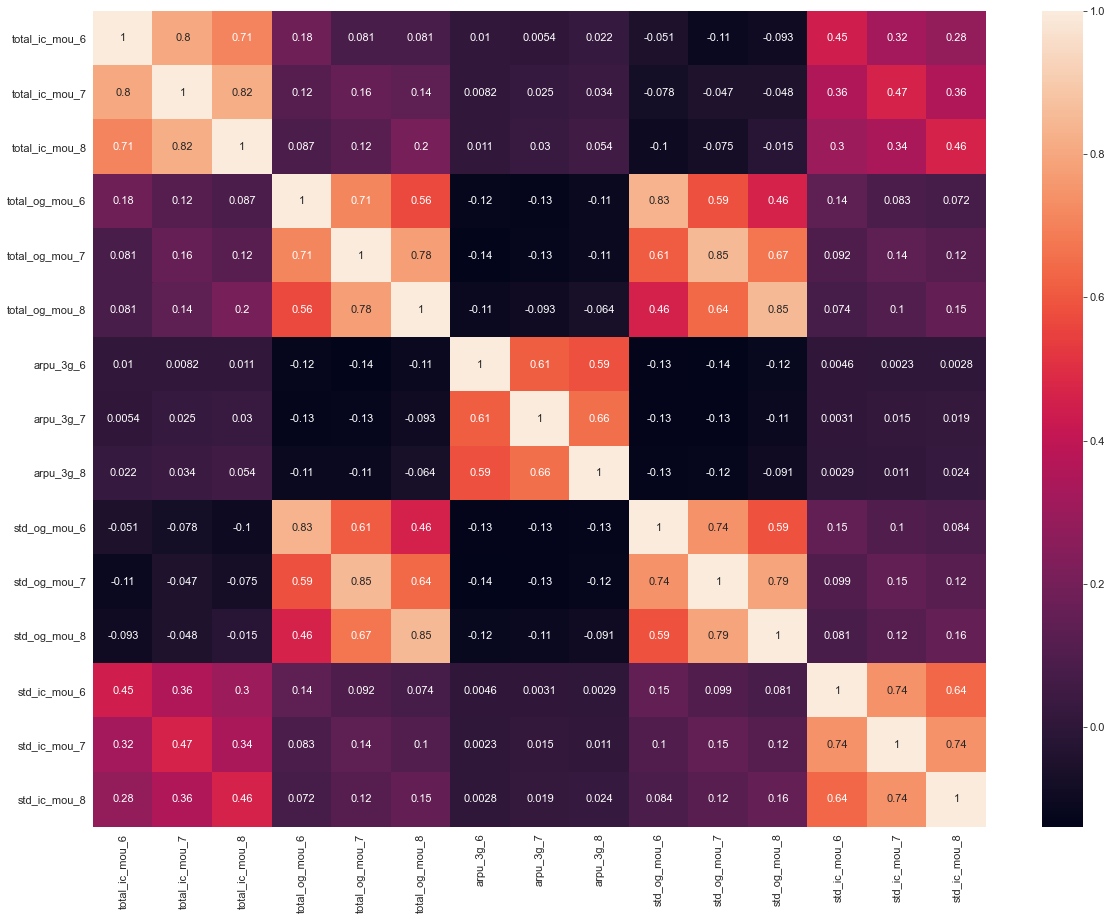

In [100]:
heat = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
       'arpu_3g_6','arpu_3g_7','arpu_3g_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']

plt.figure(figsize=(20,15))
sns.heatmap(df[heat].corr(), annot = True)
plt.show()

### Recharge Amount

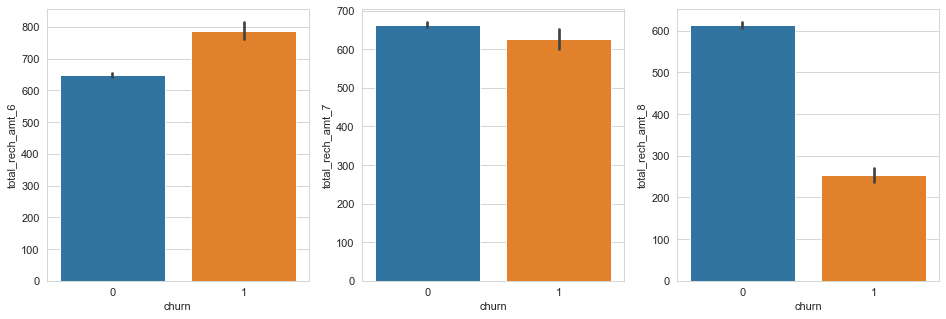

In [101]:
col = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
    sns.barplot(x = 'churn',y=j,data=df)

<br>

### 2G Data recharge

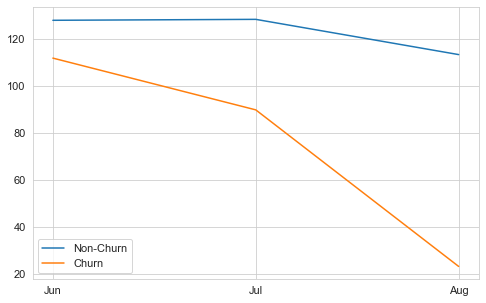

In [102]:
cols = ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.show()

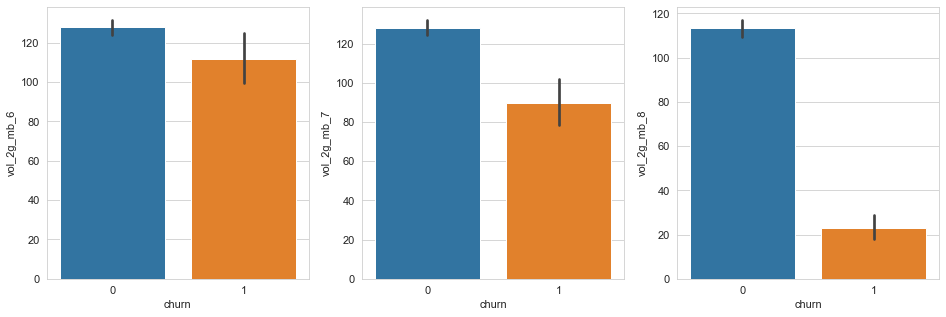

In [103]:
col = ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
    sns.barplot(x = 'churn',y=j,data=df)

### 3G Data recharge

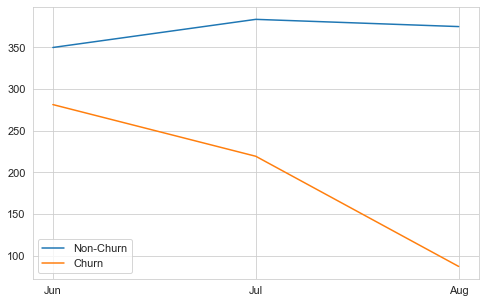

In [104]:
cols = ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.show()

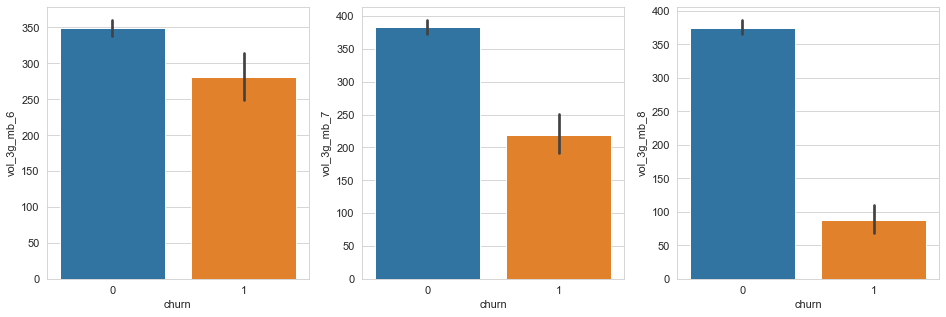

In [105]:
col = ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
    sns.barplot(x = 'churn',y=j,data=df)

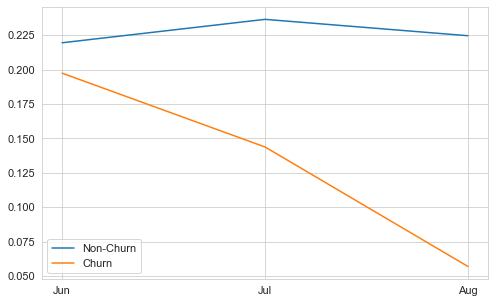

In [106]:
cols = ['monthly_3g_6','monthly_3g_7','monthly_3g_8']
plt.plot(df.groupby(['churn'])[cols].mean().T)
plt.legend(['Non-Churn', 'Churn'])
labels = ['Jun','Jul','Aug']
plt.xticks(cols, labels)
plt.show()

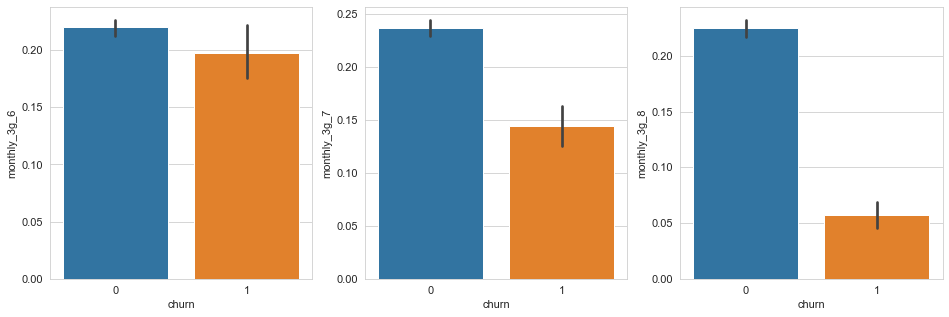

In [107]:
col = ['monthly_3g_6','monthly_3g_7','monthly_3g_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(col):
    plt.subplot(1,3,i+1)
    sns.barplot(x = 'churn',y=j,data=df)

<br>

<br>

## Model Building

In [108]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
import xgboost

In [109]:
from sklearn.model_selection import train_test_split

#Assigning features variables in X
X = df.drop(['churn','mobile_number'], axis=1)

#Assigning response variables in Y
y = df['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [110]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21000, 176) (21000,)
(9001, 176) (9001,)


In [111]:
#Rescaling the features before PCA as it is sensitive to the scale of the feature variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [112]:
# fitting and transforming the scaler on train
X_train_scaled = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test_scaled = scaler.transform(X_test)

In [113]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,roam_ic_mou_diff,roam_og_mou_diff,monthly_2g_diff,monthly_3g_diff,fb_user_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_ic_t2m_mou_diff,std_og_mou_diff,loc_og_mou_diff
0,0.111540,0.078696,0.027671,0.000771,0.001015,0.000450,0.018164,0.016449,0.007001,0.011185,...,0.641517,0.559172,0.538462,0.482759,0.50,0.623464,0.540991,0.547380,0.640479,0.545133
1,0.092434,0.062585,0.020929,0.019642,0.006110,0.003786,0.038403,0.023547,0.018948,0.000000,...,0.642427,0.559100,0.538462,0.482759,0.50,0.623975,0.542809,0.528154,0.643807,0.543885
2,0.085263,0.062654,0.019432,0.009398,0.009450,0.007745,0.039855,0.030865,0.015231,0.006848,...,0.631838,0.549127,0.538462,0.482759,1.00,0.622345,0.554789,0.534520,0.644075,0.553815
3,0.116502,0.062910,0.031001,0.323069,0.020329,0.064863,0.056199,0.020785,0.039625,0.000000,...,0.641619,0.557855,0.538462,0.482759,0.50,0.565296,0.514289,0.537697,0.697101,0.455270
4,0.089917,0.066512,0.017980,0.002390,0.005634,0.002222,0.022342,0.031246,0.005830,0.000000,...,0.642427,0.559100,0.538462,0.482759,0.50,0.624217,0.565655,0.571176,0.640748,0.564271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0.084216,0.058946,0.016668,0.020699,0.009636,0.006745,0.005568,0.003604,0.001689,0.000313,...,0.642538,0.559252,0.692308,0.482759,0.50,0.623550,0.540625,0.541324,0.643366,0.544923
20996,0.095822,0.077460,0.031005,0.069752,0.142506,0.097190,0.060992,0.075889,0.039937,0.060326,...,0.663957,0.582402,0.538462,0.482759,0.50,0.622076,0.536631,0.539028,0.630128,0.536851
20997,0.084324,0.054232,0.010580,0.001408,0.000000,0.000068,0.003747,0.000163,0.000770,0.000000,...,0.642427,0.559100,0.615385,0.482759,0.75,0.623748,0.540977,0.536172,0.640807,0.545333
20998,0.111345,0.066156,0.017677,0.043568,0.019091,0.004276,0.195877,0.049040,0.012066,0.000000,...,0.642427,0.559100,0.538462,0.482759,0.50,0.641057,0.689647,0.549748,0.641622,0.668979


In [114]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 

Before OverSampling, churn event rate : 8.05% 



In [115]:
#!pip install imblearn --user

In [116]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=15)
X_train_scaled, y_train = sm.fit_sample(X_train_scaled, y_train)

In [117]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_scaled.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

After OverSampling, the shape of X_train: (38618, 176)
After OverSampling, the shape of y_train: (38618,) 

After OverSampling, counts of label '1': 19309
After OverSampling, counts of label '0': 19309
After OverSampling, churn event rate : 50.0% 



In [118]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state= 100)

In [119]:
#PCA on the train data
pca.fit(X_train_scaled)

PCA(random_state=100)

In [120]:
pca.explained_variance_ratio_[:50]

array([0.51195456, 0.1483721 , 0.08350544, 0.0445097 , 0.0246233 ,
       0.02005685, 0.01675712, 0.01575418, 0.01244179, 0.01080762,
       0.00869289, 0.00786096, 0.00644191, 0.00536   , 0.00509663,
       0.00471805, 0.00438393, 0.00414814, 0.00381374, 0.00345022,
       0.00312314, 0.00298709, 0.00296873, 0.00275249, 0.00251716,
       0.0022362 , 0.00208788, 0.0020672 , 0.001941  , 0.00179485,
       0.00157015, 0.00153465, 0.00149429, 0.00138882, 0.00133632,
       0.00127231, 0.00123371, 0.00112126, 0.00108283, 0.00098598,
       0.00096137, 0.0009063 , 0.00076948, 0.00074436, 0.0007079 ,
       0.00068951, 0.0006224 , 0.00059313, 0.00056884, 0.00056041])

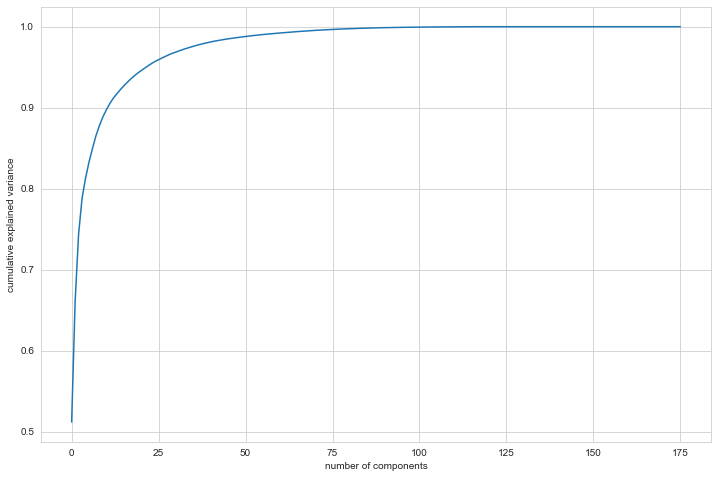

In [121]:
#Making the scree plot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [122]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

In [123]:
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_train_pca.shape

(38618, 25)

In [124]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.00879656381460047 , min corr:  -0.01855788647227752


In [125]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test_scaled)
X_test_pca.shape

(9001, 25)

## Logistic Regression

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [127]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter = 1000)

optimization_dict = {'class_weight':['balanced', None],
                     'solver':['sag', 'saga'],
                     'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 4, 5, 10]
                     }

In [128]:
# set GridSearchCV parameters
model = GridSearchCV(lr, optimization_dict, 
                     scoring='accuracy', n_jobs = -1, cv = 5)

In [129]:
model.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 4, 5, 10],
                         'class_weight': ['balanced', None],
                         'solver': ['sag', 'saga']},
             scoring='accuracy')

In [130]:
print(model.best_score_)
print(model.best_params_)

0.8259621046256406
{'C': 10, 'class_weight': 'balanced', 'solver': 'saga'}


In [131]:
lr = LogisticRegression(C=10, solver='saga')

In [132]:
mod = lr.fit(X_train_pca,y_train)

In [133]:
y_test_pred = mod.predict(X_test_pca)

In [134]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8251
           1       0.30      0.82      0.43       750

    accuracy                           0.82      9001
   macro avg       0.64      0.82      0.66      9001
weighted avg       0.92      0.82      0.86      9001



In [135]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_test_pred))

[[6781 1470]
 [ 133  617]]


In [136]:
metrics.accuracy_score(y_test,y_test_pred)

0.8219086768136874

In [137]:
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))

0.2956396741734547
0.8226666666666667


In [138]:
accuracy_lr = metrics.accuracy_score(y_test, y_test_pred)
precision_lr = metrics.precision_score(y_test, y_test_pred)
recall_lr = metrics.recall_score(y_test, y_test_pred)

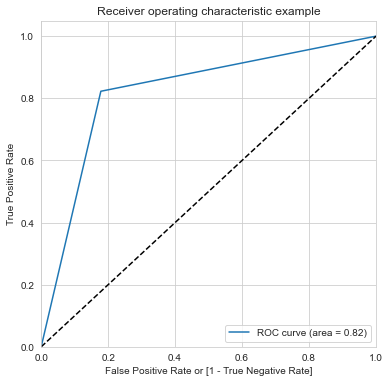

In [139]:
draw_roc(y_test,y_test_pred)
plt.show()

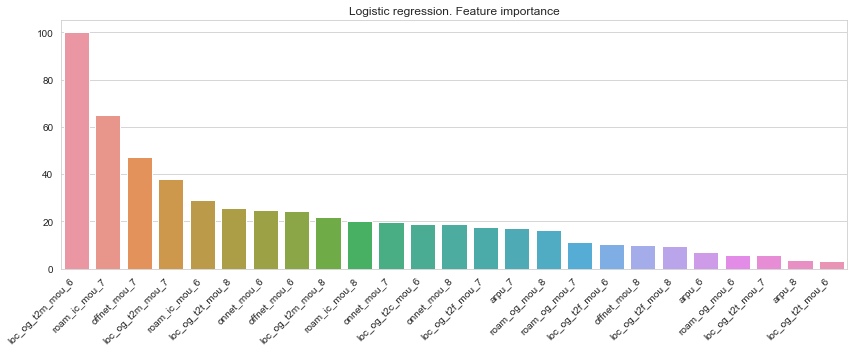

In [140]:
# calculate importances based on coefficients.
importances = abs(lr.coef_[0])
importances = 100.0 * (importances / importances.max())
# sort 
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# visualize
plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
chart = sns.barplot(x = names, y = importances[indices])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Logistic regression. Feature importance')
plt.tight_layout()

<br>

**Let us try for PCA with 95% variance**

In [141]:
pca_again = PCA(0.95)

In [142]:
X_train_pca2 = pca_again.fit_transform(X_train_scaled)

In [143]:
X_test_pca2 = pca_again.transform(X_test_scaled)

In [144]:
model.fit(X_train_pca2,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 4, 5, 10],
                         'class_weight': ['balanced', None],
                         'solver': ['sag', 'saga']},
             scoring='accuracy')

In [145]:
print(model.best_score_)
print(model.best_params_)

0.8261693014731397
{'C': 10, 'class_weight': 'balanced', 'solver': 'sag'}


In [146]:
lr2 = LogisticRegression(C=10,class_weight='balanced',solver='sag')

In [147]:
temp = lr2.fit(X_train_pca2,y_train)

In [148]:
y_test_pred2 = temp.predict(X_test_pca2)

In [149]:
print(metrics.confusion_matrix(y_test,y_test_pred2))

[[6806 1445]
 [ 136  614]]


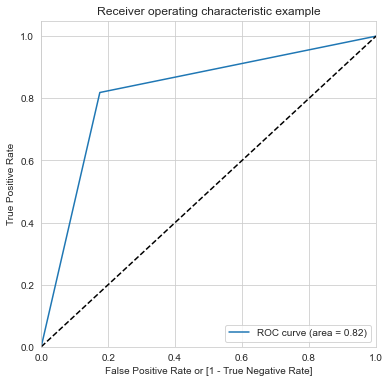

In [150]:
draw_roc(y_test,y_test_pred2)
plt.show()

In [151]:
print(metrics.precision_score(y_test,y_test_pred2))
print(metrics.recall_score(y_test,y_test_pred2))

0.2982030111704711
0.8186666666666667


In [152]:
accuracy_pca95 = metrics.accuracy_score(y_test, y_test_pred2)
precision_pca95 = metrics.precision_score(y_test, y_test_pred2)
recall_pca_95 = metrics.recall_score(y_test, y_test_pred2)

In [153]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
        
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    
    # Let's see the head
    #getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [154]:
y_train_df = predictChurnWithProb(lr2,X_train_pca2,y_train,0.5)
y_train_df

,churn,churn_Prob,final_predicted
0,0,0.409620,0
1,0,0.064444,0
2,0,0.313811,0
3,0,0.000096,0
4,0,0.067316,0
...,...,...,...
38613,1,0.289299,0
38614,1,0.173994,0
38615,1,0.441321,0
38616,1,0.422870,0


In [155]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
    plt.show()

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.679450     0.976747     0.382153
0.2   0.2  0.746439     0.953234     0.539645
0.3   0.3  0.789140     0.926045     0.652235
0.4   0.4  0.815449     0.888394     0.742503
0.5   0.5  0.826428     0.838366     0.814491
0.6   0.6  0.824020     0.773940     0.874100
0.7   0.7  0.815164     0.715211     0.915117
0.8   0.8  0.775416     0.603863     0.946968
0.9   0.9  0.613056     0.244083     0.982029


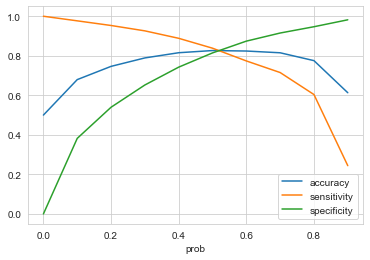

In [156]:
findOptimalCutoff(y_train_df)

In [157]:
predictChurnWithProb(lr2,X_test_pca2,y_test,0.5)

,churn,churn_Prob,final_predicted
20296,1,0.731736,1
8279,1,0.549802,1
72269,0,0.037743,0
65602,0,0.319057,0
42758,1,0.831606,1
...,...,...,...
40214,0,0.268523,0
59799,0,0.023031,0
18784,0,0.000255,0
4712,0,0.416239,0


Both model gives us good sensitivity of `82.1%` and `81.8%` : Lesser the false neagatives better the model

<br>

## Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf = RandomForestClassifier()

In [160]:
rf.fit(X_train_pca,y_train)

RandomForestClassifier()

In [161]:
y_test_pred = rf.predict(X_test_pca)

In [162]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[7703,  548],
       [ 291,  459]], dtype=int64)

In [163]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8251
           1       0.46      0.61      0.52       750

    accuracy                           0.91      9001
   macro avg       0.71      0.77      0.74      9001
weighted avg       0.92      0.91      0.91      9001



Recall has taken a significant hit, let us tune the parameters to get a better model

In [164]:
rf = RandomForestClassifier(class_weight='balanced',random_state = 100)
params = {          'n_estimators': range(100,600,100), 'max_depth': [4,8,10],
                     'min_samples_split': range(100,500,200),
                     'min_samples_leaf': range(100,600,200),
                     'max_features':[5,10]
         }

In [165]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf, params, scoring = 'accuracy', n_jobs = -1, verbose = True, cv =3)

In [166]:
grid.fit(X_train_pca,y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 38.4min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 600, 200),
                         'min_samples_split': range(100, 500, 200),
                         'n_estimators': range(100, 600, 100)},
             scoring='accuracy', verbose=True)

In [167]:
print(grid.best_score_)
print(grid.best_params_)

0.8407218651378235
{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 500}


In [168]:
rf_final = RandomForestClassifier(max_depth=10,
                                  n_estimators=500,
                                  min_samples_leaf=100,
                                  min_samples_split=100,
                                  max_features =10,
                                  random_state=100)

In [169]:
rf_final.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=500,
                       random_state=100)

In [170]:
# predict on test data
y_test_pred = rf_final.predict(X_test_pca)

In [171]:
print(confusion_matrix(y_test,y_test_pred))

[[7057 1194]
 [ 180  570]]


In [172]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8251
           1       0.32      0.76      0.45       750

    accuracy                           0.85      9001
   macro avg       0.65      0.81      0.68      9001
weighted avg       0.92      0.85      0.87      9001



In [173]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

,churn,churn_Prob,final_predicted
0,0,0.335839,0
1,0,0.042649,0
2,0,0.558376,1
3,0,0.154647,0
4,0,0.283929,0


     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.641721     0.999379     0.284064
0.2   0.2  0.756849     0.988088     0.525610
0.3   0.3  0.829561     0.961883     0.697240
0.4   0.4  0.856984     0.915066     0.798902
0.5   0.5  0.860091     0.856388     0.863794
0.6   0.6  0.846082     0.782226     0.909938
0.7   0.7  0.819022     0.695116     0.942928
0.8   0.8  0.765602     0.561811     0.969393
0.9   0.9  0.638951     0.283495     0.994407


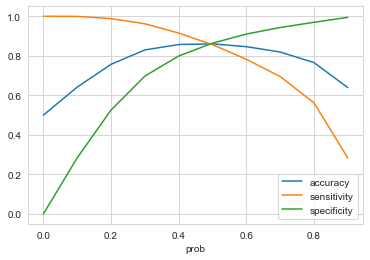

In [174]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [175]:
cut_off_prob=0.48
predictChurnWithProb(rf_final,X_train_pca,y_train,cut_off_prob)

,churn,churn_Prob,final_predicted
0,0,0.335839,0
1,0,0.042649,0
2,0,0.558376,1
3,0,0.154647,0
4,0,0.283929,0
...,...,...,...
38613,1,0.276892,0
38614,1,0.424407,0
38615,1,0.434005,0
38616,1,0.409292,0


In [176]:
# Fitting against test_data
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

,churn,churn_Prob,final_predicted
20296,1,0.812400,1
8279,1,0.575507,1
72269,0,0.475059,0
65602,0,0.143229,0
42758,1,0.700530,1


In [177]:
#Let us print the confusion matrix for the model with 0.48 as cut off probability
print(confusion_matrix(y_test_df.churn,y_test_df.final_predicted))

[[6975 1276]
 [ 170  580]]


In [178]:
accuracy_rf = metrics.accuracy_score(y_test_df.churn, y_test_df.final_predicted)
precision_rf = metrics.precision_score(y_test_df.churn, y_test_df.final_predicted)
recall_rf = metrics.recall_score(y_test_df.churn, y_test_df.final_predicted)

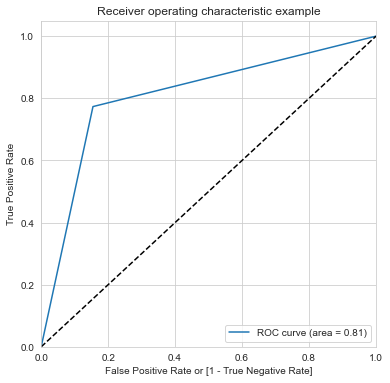

In [179]:
draw_roc(y_test_df.churn, y_test_df.final_predicted)
plt.show()

In [180]:
importances = rf_final.feature_importances_

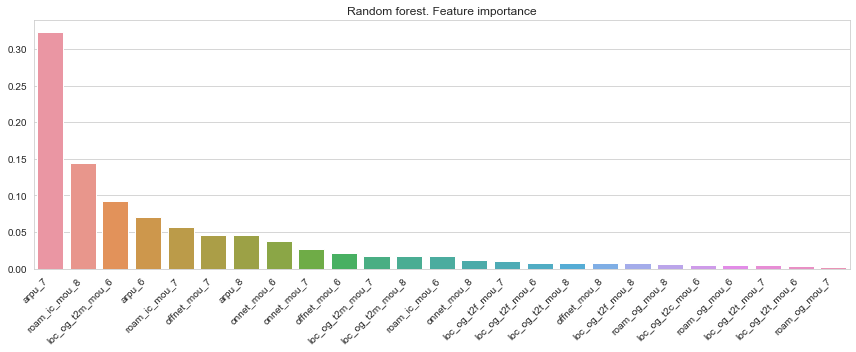

In [181]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
chart = sns.barplot(x = names, y=importances[indices])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Random forest. Feature importance')
plt.tight_layout()

### XG BOOST

In [182]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [183]:
xgb_model = XGBClassifier(random_state = 100)
# create a dictionary of parameters values we want to try
optimization_dict = {'n_estimators': range(100,600,100),
                     'max_depth': [4, 8, 10],
                     'learning_rate': [0.1, 0.2],
                     'subsample': [0.5, 0.8, 0.9]
                     }
# set GridSearchCV parameters
model = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='accuracy', verbose = 1, n_jobs = -1, cv = 3)

In [184]:
model.fit(X_train_pca,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 31.4min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=100,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [185]:
print(model.best_score_)
print(model.best_params_)

0.9486249981512914
{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.8}


In [186]:
# create a dictionary of parameters values we want to try
params = {'n_estimators': [500],
                     'max_depth': [8],
                     'learning_rate': [0.2],
                     'subsample': [0.8]
                     }

xgb_final = XGBClassifier(params = params,random_state = 100,objective ='reg:logistic')

In [187]:
xgb_final.fit(X_train_pca,y_train)

[13:06:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic',
              params={'learning_rate': [0.2], 'max_depth': [8],
                      'n_estimators': [500], 'subsample': [0.8]},
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [188]:
# predict on test data
predictions = xgb_final.predict(X_test_pca)

In [189]:
print(metrics.confusion_matrix(y_test,predictions))

[[7490  761]
 [ 241  509]]


In [190]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8251
           1       0.40      0.68      0.50       750

    accuracy                           0.89      9001
   macro avg       0.68      0.79      0.72      9001
weighted avg       0.92      0.89      0.90      9001



In [191]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb_final,X_train_pca,y_train,cut_off_prob)
y_train_df

,churn,churn_Prob,final_predicted
0,0,0.086609,0
1,0,0.024013,0
2,0,0.050903,0
3,0,0.001151,0
4,0,0.033691,0
...,...,...,...
38613,1,0.723733,1
38614,1,0.640964,1
38615,1,0.482086,0
38616,1,0.848492,1


     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.876690     0.999793     0.753586
0.2   0.2  0.927132     0.998653     0.855611
0.3   0.3  0.950981     0.996271     0.905692
0.4   0.4  0.962971     0.991507     0.934435
0.5   0.5  0.969703     0.983997     0.955409
0.6   0.6  0.969263     0.969237     0.969289
0.7   0.7  0.961313     0.941737     0.980890
0.8   0.8  0.935729     0.881299     0.990160
0.9   0.9  0.857450     0.718007     0.996893


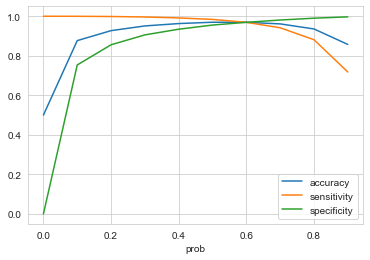

In [192]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [193]:
# predicting churn with default cut-off 0.56
cut_off_prob= 0.56
y_train_df = predictChurnWithProb(xgb_final,X_train_pca,y_train,cut_off_prob)
y_train_df

,churn,churn_Prob,final_predicted
0,0,0.086609,0
1,0,0.024013,0
2,0,0.050903,0
3,0,0.001151,0
4,0,0.033691,0
...,...,...,...
38613,1,0.723733,1
38614,1,0.640964,1
38615,1,0.482086,0
38616,1,0.848492,1


In [194]:
print(classification_report(y_train_df.churn,y_train_df.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     19309
           1       0.97      0.98      0.97     19309

    accuracy                           0.97     38618
   macro avg       0.97      0.97      0.97     38618
weighted avg       0.97      0.97      0.97     38618



In [195]:
y_test_df= predictChurnWithProb(xgb_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

,churn,churn_Prob,final_predicted
20296,1,0.740418,1
8279,1,0.885287,1
72269,0,0.000890,0
65602,0,0.025323,0
42758,1,0.105217,0


In [196]:
print(classification_report(y_test_df.churn,y_test_df.final_predicted))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8251
           1       0.43      0.66      0.52       750

    accuracy                           0.90      9001
   macro avg       0.70      0.79      0.73      9001
weighted avg       0.92      0.90      0.91      9001



In [197]:
accuracy_xgb = metrics.accuracy_score(y_test_df.churn, y_test_df.final_predicted)
precision_xbg = metrics.precision_score(y_test_df.churn, y_test_df.final_predicted)
recall_xgb = metrics.recall_score(y_test_df.churn, y_test_df.final_predicted)

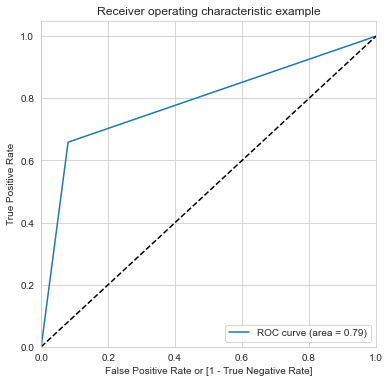

(array([0.       , 0.0802327, 1.       ]),
 array([0.        , 0.65866667, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [198]:
draw_roc(y_test_df.churn, y_test_df.final_predicted)

In [199]:
importances = xgb_final.feature_importances_

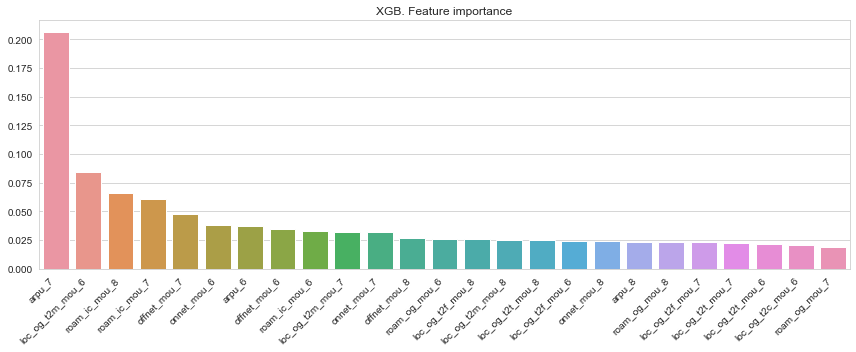

In [200]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
chart = sns.barplot(x = names, y=importances[indices])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('XGB. Feature importance')
plt.tight_layout()

In [201]:
from sklearn import model_selection

In [202]:
models = []
# add our tuned models into list
models.append(('Logistic Regression', lr))
models.append(('Random Forest', rf_final))
models.append(('XGBoost', xgb_final))

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state = 64)
    cv_results = model_selection.cross_val_score(model, X, 
                                                 y, 
                                                 cv = 10, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    # print mean accuracy and standard deviation
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

Logistic Regression: 0.929302 (0.001917)
Random Forest: 0.942702 (0.004112)
[13:13:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:13:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:13:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may 

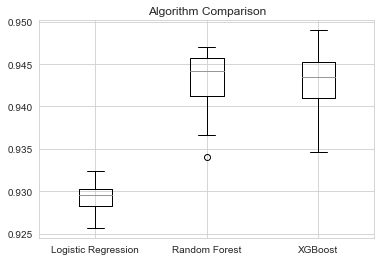

In [203]:
fig = plt.figure(figsize=(6,4))
plt.boxplot(results)
plt.title('Algorithm Comparison')
plt.xticks([1,2,3], names)
plt.show()

### Assessing the models

In [204]:
metrics_df = pd.DataFrame({'Metric' : ['Accuracy', 'Precision', 'Recall'],
                           'LR with PCA 25 Components' : [accuracy_lr, precision_lr, recall_lr],
                           'LR with PCA 90% Variance' : [accuracy_pca95, precision_pca95, recall_pca_95],
                           'XGBoost' : [accuracy_xgb, precision_xbg, recall_xgb],
                           'Random Forest' : [accuracy_rf, precision_rf, recall_rf]})

In [205]:
metrics_df.set_index(['Metric'])

,LR with PCA 25 Components,LR with PCA 90% Variance,XGBoost,Random Forest
Metric,,,,
Accuracy,0.821909,0.824353,0.898011,0.839351
Precision,0.295640,0.298203,0.427336,0.312500
Recall,0.822667,0.818667,0.658667,0.773333


<br>

### Random Forest - without PCA

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [207]:
rf1 = RandomForestClassifier(class_weight='balanced')

In [208]:
#Fitting train data
rf1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [209]:
#Predict on the test set
y_test_pred = rf1.predict(X_test)

In [210]:
print(metrics.confusion_matrix(y_test,y_test_pred))

[[8152   99]
 [ 406  344]]


In [211]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.78      0.46      0.58       750

    accuracy                           0.94      9001
   macro avg       0.86      0.72      0.77      9001
weighted avg       0.94      0.94      0.94      9001



In [212]:
# Let us tune the model with all the hyperparamters

In [213]:
rf2 = RandomForestClassifier(class_weight='balanced',random_state = 100)
params = {          'n_estimators': range(100,600,100), 'max_depth': [4,8,10],
                     'min_samples_split': range(100,500,200),
                     'min_samples_leaf': range(100,600,200),
                     'max_features':[5,10]
         }

In [214]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf2, params, scoring = 'accuracy', n_jobs = -1, verbose = True, cv =3)

In [215]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  9.4min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 600, 200),
                         'min_samples_split': range(100, 500, 200),
                         'n_estimators': range(100, 600, 100)},
             scoring='accuracy', verbose=True)

In [216]:
print(grid.best_score_)
print(grid.best_params_)

0.8963809523809524
{'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}


In [217]:
rf1_final = RandomForestClassifier(class_weight='balanced',max_depth=4,
                                  n_estimators=100,
                                  min_samples_leaf=100,
                                  min_samples_split=100,
                                  max_features =10,
                                  random_state=100)

In [218]:
rf1_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=10,
                       min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

In [219]:
# predict on test data
y_test_pred = rf1_final.predict(X_test)

In [220]:
print(confusion_matrix(y_test,y_test_pred))

[[7550  701]
 [ 175  575]]


In [221]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8251
           1       0.45      0.77      0.57       750

    accuracy                           0.90      9001
   macro avg       0.71      0.84      0.76      9001
weighted avg       0.93      0.90      0.91      9001



In [222]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf1_final,X_train,y_train,cut_off_prob)
y_train_df.head()

,churn,churn_Prob,final_predicted
39186,0,0.392325,0
39833,0,0.119563,0
38778,0,0.347221,0
43026,0,0.292048,0
12271,0,0.151753,0


     prob  accuracy  sensitivity  specificity
0.0   0.0  0.080524     1.000000     0.000000
0.1   0.1  0.088095     1.000000     0.008235
0.2   0.2  0.453571     0.986399     0.406909
0.3   0.3  0.736810     0.942637     0.718784
0.4   0.4  0.849667     0.851567     0.849500
0.5   0.5  0.898524     0.767002     0.910042
0.6   0.6  0.923667     0.671792     0.945725
0.7   0.7  0.939714     0.576582     0.971516
0.8   0.8  0.943429     0.508575     0.981511
0.9   0.9  0.943381     0.426375     0.988658


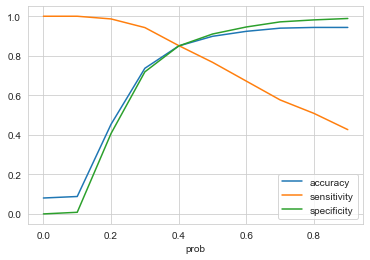

In [223]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [224]:
cut_off_prob=0.38
model_train = predictChurnWithProb(rf1_final,X_train,y_train,cut_off_prob)
model_train

,churn,churn_Prob,final_predicted
39186,0,0.392325,1
39833,0,0.119563,0
38778,0,0.347221,0
43026,0,0.292048,0
12271,0,0.151753,0
...,...,...,...
40261,0,0.211486,0
81456,0,0.166032,0
47136,0,0.349971,0
77825,0,0.358647,0


In [225]:
# Fitting against test_data
y_test_df= predictChurnWithProb(rf1_final,X_test,y_test,cut_off_prob)
y_test_df.head()

,churn,churn_Prob,final_predicted
20296,1,0.365315,0
8279,1,0.462973,1
72269,0,0.193274,0
65602,0,0.212510,0
42758,1,0.729764,1


In [226]:
#Let us print the confusion matrix for the model with 0.38 as cut off probability
print(confusion_matrix(y_test_df.churn,y_test_df.final_predicted))

[[6905 1346]
 [ 101  649]]


In [227]:
print(classification_report(y_test_df.churn,y_test_df.final_predicted))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      8251
           1       0.33      0.87      0.47       750

    accuracy                           0.84      9001
   macro avg       0.66      0.85      0.69      9001
weighted avg       0.93      0.84      0.87      9001



In [228]:
accuracy_rf_simple = metrics.accuracy_score(y_test_df.churn, y_test_df.final_predicted)
precision_rf_simple = metrics.precision_score(y_test_df.churn, y_test_df.final_predicted)
recall_rf_simple = metrics.recall_score(y_test_df.churn, y_test_df.final_predicted)

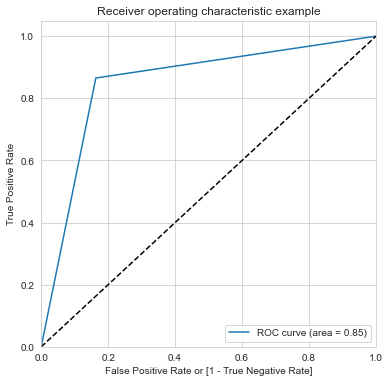

(array([0.        , 0.16313174, 1.        ]),
 array([0.        , 0.86533333, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [229]:
draw_roc(y_test_df.churn,y_test_df.final_predicted)

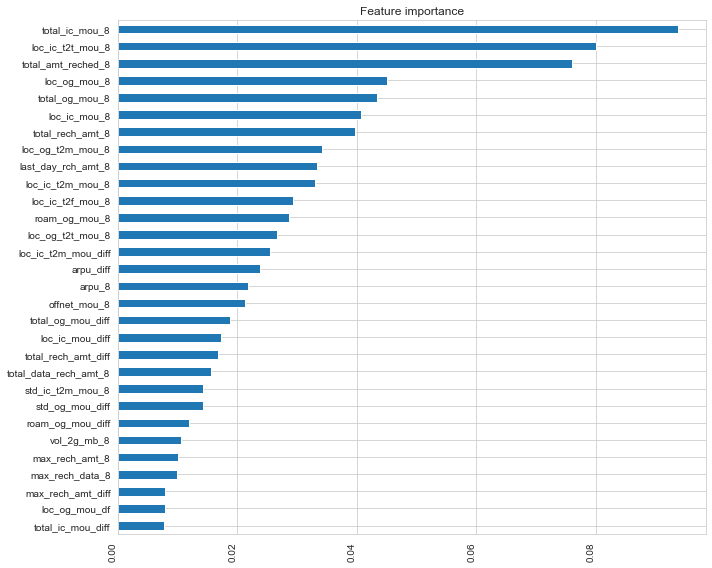

In [230]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(rf1_final.feature_importances_, index=X.columns)
feat_importances.nlargest(30).sort_values(ascending=True).plot(kind='barh', align='center')
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Feature importance')
plt.tight_layout()

**Probability cut off anywhere between 0.38 and 0.4 gives us the better model, the recall has bumped up, and the False negative value is drastically decreased to 101**

**Logistic Regression model's FN was 134/136 dpending upon variance**

The important variables are as follows

In [231]:
feat_importances.nlargest(10).index

Index(['total_ic_mou_8', 'loc_ic_t2t_mou_8', 'total_amt_reched_8',
       'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'total_rech_amt_8',
       'loc_og_t2m_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2m_mou_8'],
      dtype='object')

1. **`total_ic_mou_8`**
2. loc_ic_t2t_mou_8
3. **`total_amt_reched_8`**
4. loc_og_mou_8
5. **`total_og_mou_8`**
6. loc_ic_mou_8
7. **`total_rech_amt_8`**
8. loc_og_t2m_mou_8
9. **`last_day_rch_amt_8`**
10. loc_ic_t2m_mou_8

The above are the important metrics are suggested by RF model, the other metrics also include roaming tariffs, offnet tariffs and data recharges

## Metrics to be considered for better service to customers

1. To imporove the incoming and outgoing call quality which might be hindering the customers in using the network.

2. Amount of recharge (Voice+Data) combos should be revised, higher tariff charges will make customers to churn from the existing network.

3. Call tariffs for outgoing calls to same and other network should be revised to keep customers happy.

4. New plans/exciting offers should be rolled out to the customers who are already in the action phase to keep them in the network.

<br>

<br>

<br>

Let us try using Stats Model API for Logistic Regresion

### Logistic Regression

In [232]:
import statsmodels.api as sm

In [233]:
df_last.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,roam_ic_mou_diff,roam_og_mou_diff,monthly_2g_diff,monthly_3g_diff,fb_user_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_ic_t2m_mou_diff,std_og_mou_diff,loc_og_mou_diff
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.0,0.0,0.000,0.000,-4.130,0.000,0.000
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,-6.78,-19.895,0.0,0.0,0.0,1.105,215.725,98.335,-9.840,222.245
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0.00,0.000,0.5,0.0,-0.5,244.870,25.230,20.300,38.590,270.095
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0.00,0.000,0.0,0.0,0.0,-18.020,-14.940,-32.730,-89.800,-34.175
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0.00,0.000,0.0,0.0,-0.5,16.230,-65.585,-42.205,-35.255,-49.345


In [234]:
HVC = df_last.drop(['mobile_number'],axis='columns')

In [235]:
y = HVC.pop('churn')
X = HVC

In [236]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

In [237]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [238]:
cols = list(X_train.columns)
scale = StandardScaler()
X_train[cols] = scale.fit_transform(X_train[cols])
X_test[cols] = scale.transform(X_test[cols])

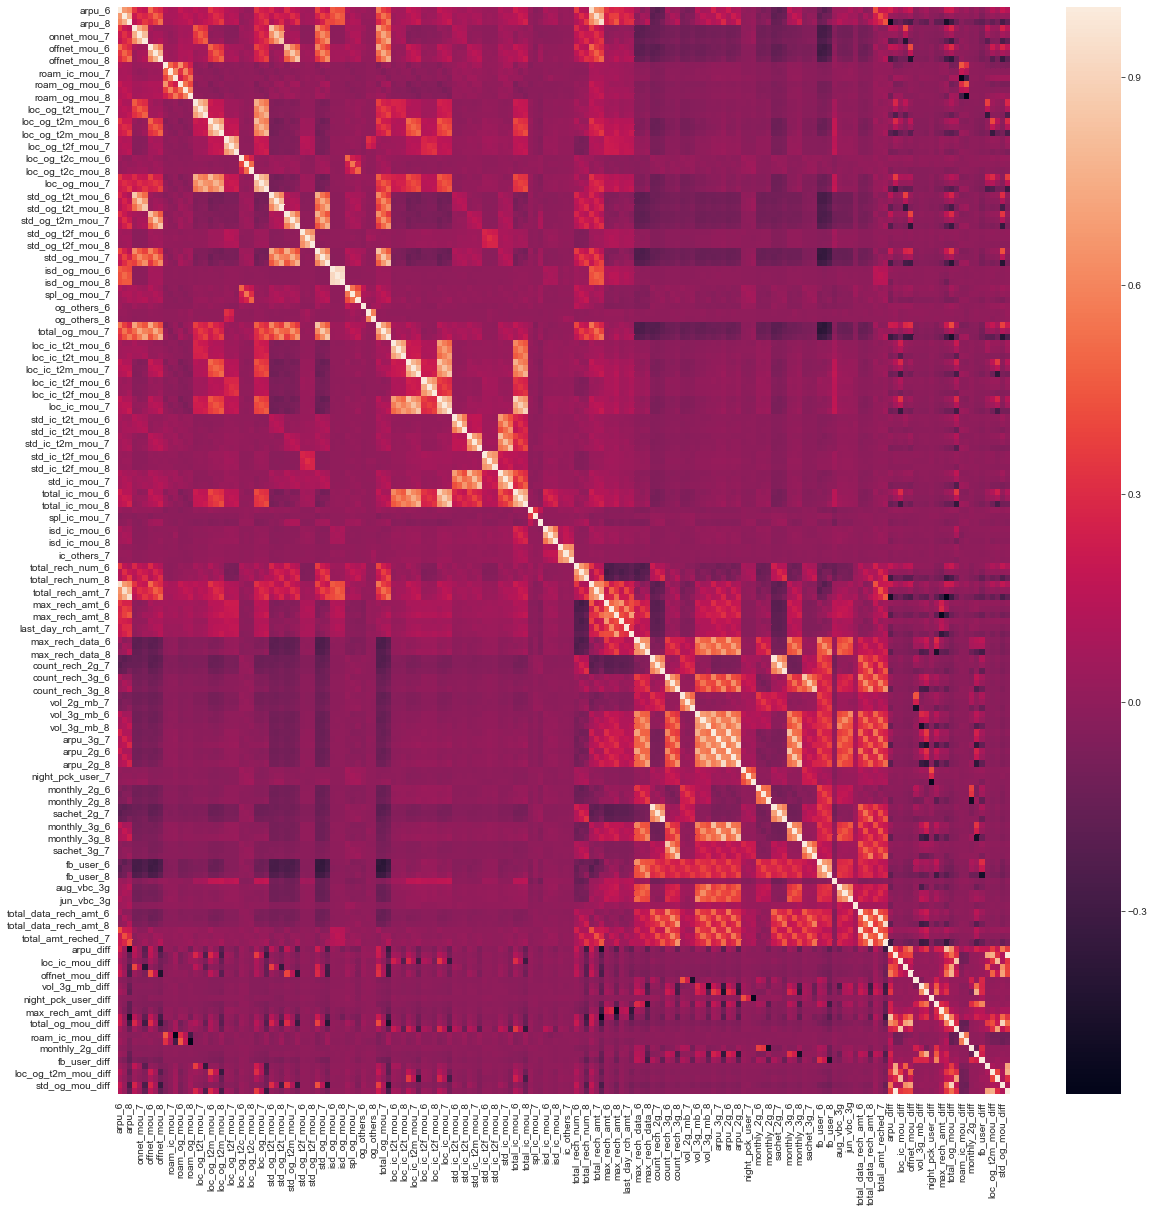

In [239]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(HVC.corr())
plt.show()

In [240]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20856
Model Family:                Binomial   Df Model:                          143
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3637.2
Date:                Sun, 30 Aug 2020   Deviance:                       7274.4
Time:                        13:25:03   Pearson chi2:                 2.41e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.1351      0.078    -52.741      0.000      -4.289      -3.981
arpu_6                    0.3264      0.113      2.886      0.004       0.105       0.548
arpu_7                    0.2688      0.142      1.894      0.058      -0.009       0.547
arpu_8                    0.2458      0.101      2.442      0.015       0.049       0.443
onnet_mou_6              -0.9768      2.555     -0.382      0.702      -5.985       4.032
onnet_mou_7              -0.1748      1.670     -0.105      0.917      -3.447       3.098
onnet_mou_8              -1.3207      1.216     -1.086      0.278      -3.705       1.063
offnet_mou_6             -0.7770      2.669     -0.291      0.771      -6.007       4.453
offnet_mou_7             -0.4371      1.699     -0.257      0.797      -3.767       2.893
offnet_mou_8             -1.5617      1.319     -1.184      0.236      -4.147       1.024
roam_ic_mou_6             0.0359      0.040      0.889      0.374      -0.043       0.115
roam_ic_mou_7            -0.0002      0.034     -0.005      0.996      -0.066       0.066
roam_ic_mou_8            -0.0180      0.017     -1.057      0.291      -0.051       0.015
roam_og_mou_6             0.1615      0.647      0.249      0.803      -1.108       1.430
roam_og_mou_7             0.1549      0.360      0.430      0.667      -0.551       0.861
roam_og_mou_8             0.4313      0.353      1.222      0.222      -0.261       1.123
loc_og_t2t_mou_6       2639.3252   1223.430      2.157      0.031     241.446    5037.204
loc_og_t2t_mou_7       1833.4375   1277.084      1.436      0.151    -669.600    4336.475
loc_og_t2t_mou_8       3739.6899    811.524      4.608      0.000    2149.132    5330.248
loc_og_t2m_mou_6       2910.5953   1332.611      2.184      0.029     298.727    5522.464
loc_og_t2m_mou_7       1841.8720   1315.609      1.400      0.162    -736.674    4420.418
loc_og_t2m_mou_8       4021.6483    862.007      4.665      0.000    2332.145    5711.152
loc_og_t2f_mou_6         82.0734    131.984      0.622      0.534    -176.610     340.756
loc_og_t2f_mou_7        -10.9607    136.096     -0.081      0.936    -277.704     255.783
loc_og_t2f_mou_8        661.4335    136.139      4.859      0.000     394.606     928.261
loc_og_t2c_mou_6         -0.0810      0.038     -2.124      0.034      -0.156      -0.006
loc_og_t2c_mou_7          0.0384      0.046      0.839      0.402      -0.051       0.128
loc_og_t2c_mou_8          0.0532      0.050      1.055      0.291      -0.046       0.152
loc_og_mou_6          -4751.8429   2512.356     -1.891      0.059   -9675.970     172.284
loc_og_mou_7          -2099.9627   2671.309     -0.786      0.432   -7335.633    3135.707
loc_og_mou_8          -3900.6271   1661.777     -2.347      0.019   -7157.651    -643.604
std_og_t2t_mou_6       

#### Feature Selection Using RFE

In [241]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [242]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [243]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 11),
 ('arpu_8', False, 43),
 ('onnet_mou_6', False, 100),
 ('onnet_mou_7', False, 44),
 ('onnet_mou_8', False, 162),
 ('offnet_mou_6', False, 139),
 ('offnet_mou_7', False, 104),
 ('offnet_mou_8', False, 55),
 ('roam_ic_mou_6', False, 83),
 ('roam_ic_mou_7', False, 138),
 ('roam_ic_mou_8', False, 157),
 ('roam_og_mou_6', False, 140),
 ('roam_og_mou_7', False, 26),
 ('roam_og_mou_8', False, 102),
 ('loc_og_t2t_mou_6', False, 98),
 ('loc_og_t2t_mou_7', False, 63),
 ('loc_og_t2t_mou_8', False, 122),
 ('loc_og_t2m_mou_6', False, 2),
 ('loc_og_t2m_mou_7', False, 131),
 ('loc_og_t2m_mou_8', False, 61),
 ('loc_og_t2f_mou_6', False, 137),
 ('loc_og_t2f_mou_7', False, 62),
 ('loc_og_t2f_mou_8', False, 94),
 ('loc_og_t2c_mou_6', False, 76),
 ('loc_og_t2c_mou_7', False, 107),
 ('loc_og_t2c_mou_8', False, 59),
 ('loc_og_mou_6', False, 13),
 ('loc_og_mou_7', False, 135),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 101),
 ('std_og_t2t_mou_7', Fa

In [244]:
col = X_train.columns[rfe.support_]

In [245]:
X_train.columns[~rfe.support_]

Index(['arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'roam_ic_mou_diff', 'roam_og_mou_diff', 'monthly_2g_diff',
       'monthly_3g_diff', 'fb_user_diff', 'loc_og_t2t_mou_diff',
       'loc_og_t2m_mou_diff', 'loc_ic_t2m_mou_diff', 'std_og_mou_diff',
       'loc_og_mou_diff'],
      dtype='object', length=161)

#### Assessing the model with StatsModel

In [246]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4018.2
Date:                Sun, 30 Aug 2020   Deviance:                       8036.4
Time:                        13:25:56   Pearson chi2:                 6.46e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3501      0.084    -51.724      0.000      -4.515      -4.185
arpu_6                 0.3458      0.038      9.093      0.000       0.271       0.420
loc_og_mou_8          -0.5804      0.111     -5.248      0.000      -0.797      -0.364
isd_og_mou_8          -0.2548      0.042     -6.066      0.000      -0.337      -0.172
loc_ic_mou_6          -0.5230      0.120     -4.349      0.000      -0.759      -0.287
loc_ic_mou_8          -1.8127      0.183     -9.922      0.000      -2.171      -1.455
spl_ic_mou_8          -0.3848      0.061     -6.266      0.000      -0.505      -0.264
total_rech_num_8      -0.6710      0.052    -12.830      0.000      -0.773      -0.568
last_day_rch_amt_8    -0.5186      0.059     -8.838      0.000      -0.634      -0.404
count_rech_2g_6       -0.8351      0.216     -3.871      0.000      -1.258      -0.412
count_rech_2g_8       -0.3523      0.077     -4.556      0.000      -0.504      -0.201
sachet_2g_6            1.0242      0.216      4.739      0.000       0.601       1.448
fb_user_8             -0.5786      0.043    -13.371      0.000      -0.663      -0.494
sep_vbc_3g            -0.9872      0.264     -3.737      0.000      -1.505      -0.469
loc_ic_mou_diff        0.7132      0.096      7.466      0.000       0.526       0.900
offnet_mou_diff        0.1540      0.029      5.311      0.000       0.097       0.211
======================================================================================
"""

In [247]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

65002    0.417270
67088    0.049375
36410    0.047304
90870    0.110396
50581    0.013151
3165     0.237652
87443    0.142101
43891    0.029280
90367    0.011724
44566    0.107959
dtype: float64

In [248]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.41726982, 0.04937511, 0.04730385, 0.1103962 , 0.01315131,
       0.237652  , 0.14210143, 0.02927965, 0.01172415, 0.10795905])

In [249]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.417270,65002
1,0,0.049375,67088
2,0,0.047304,36410
3,0,0.110396,90870
4,0,0.013151,50581


In [250]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.417270,65002,0
1,0,0.049375,67088,0
2,0,0.047304,36410,0
3,0,0.110396,90870,0
4,0,0.013151,50581,0


In [251]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[19077   183]
 [ 1292   448]]


In [252]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19260
           1       0.71      0.26      0.38      1740

    accuracy                           0.93     21000
   macro avg       0.82      0.62      0.67     21000
weighted avg       0.92      0.93      0.91     21000



### Checking VIF

In [253]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [254]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,count_rech_2g_6,35.01
10,sachet_2g_6,34.49
4,loc_ic_mou_8,12.24
3,loc_ic_mou_6,11.89
13,loc_ic_mou_diff,6.26
9,count_rech_2g_8,1.88
0,arpu_6,1.62
1,loc_og_mou_8,1.42
11,fb_user_8,1.36
6,total_rech_num_8,1.32


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.

In [255]:
col = col.drop('count_rech_2g_6', 1)
col

Index(['arpu_6', 'loc_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'count_rech_2g_8', 'sachet_2g_6', 'fb_user_8',
       'sep_vbc_3g', 'loc_ic_mou_diff', 'offnet_mou_diff'],
      dtype='object')

In [256]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4026.4
Date:                Sun, 30 Aug 2020   Deviance:                       8052.8
Time:                        13:25:57   Pearson chi2:                 7.02e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3430      0.084    -51.671      0.000      -4.508      -4.178
arpu_6                 0.3482      0.038      9.174      0.000       0.274       0.423
loc_og_mou_8          -0.5675      0.110     -5.156      0.000      -0.783      -0.352
isd_og_mou_8          -0.2567      0.042     -6.115      0.000      -0.339      -0.174
loc_ic_mou_6          -0.5284      0.121     -4.363      0.000      -0.766      -0.291
loc_ic_mou_8          -1.8285      0.183     -9.982      0.000      -2.188      -1.470
spl_ic_mou_8          -0.3854      0.061     -6.274      0.000      -0.506      -0.265
total_rech_num_8      -0.6489      0.052    -12.554      0.000      -0.750      -0.548
last_day_rch_amt_8    -0.5144      0.059     -8.758      0.000      -0.629      -0.399
count_rech_2g_8       -0.3566      0.078     -4.569      0.000      -0.510      -0.204
sachet_2g_6            0.1998      0.034      5.914      0.000       0.134       0.266
fb_user_8             -0.6050      0.043    -14.073      0.000      -0.689      -0.521
sep_vbc_3g            -1.0055      0.266     -3.780      0.000      -1.527      -0.484
loc_ic_mou_diff        0.7141      0.096      7.405      0.000       0.525       0.903
offnet_mou_diff        0.1595      0.029      5.506      0.000       0.103       0.216
======================================================================================
"""

In [257]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [258]:
y_train_pred[:10]

array([0.40670735, 0.04876529, 0.04647033, 0.10867969, 0.01242073,
       0.2327647 , 0.13811655, 0.02824868, 0.01124735, 0.10584771])

In [259]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [260]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.406707,65002,0
1,0,0.048765,67088,0
2,0,0.046470,36410,0
3,0,0.108680,90870,0
4,0,0.012421,50581,0


In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19260
           1       0.71      0.26      0.38      1740

    accuracy                           0.93     21000
   macro avg       0.83      0.62      0.67     21000
weighted avg       0.92      0.93      0.91     21000



The accuracy is still practically the same.

In [262]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,12.24
3,loc_ic_mou_6,11.89
12,loc_ic_mou_diff,6.26
8,count_rech_2g_8,1.88
0,arpu_6,1.62
9,sachet_2g_6,1.52
1,loc_og_mou_8,1.42
6,total_rech_num_8,1.31
2,isd_og_mou_8,1.30
10,fb_user_8,1.27


In [263]:
col = col.drop('loc_ic_mou_8', 1)
col

Index(['arpu_6', 'loc_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_6',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'sachet_2g_6', 'fb_user_8', 'sep_vbc_3g',
       'loc_ic_mou_diff', 'offnet_mou_diff'],
      dtype='object')

In [264]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4082.4
Date:                Sun, 30 Aug 2020   Deviance:                       8164.7
Time:                        13:25:57   Pearson chi2:                 2.38e+11
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1299      0.077    -53.507      0.000      -4.281      -3.979
arpu_6                 0.3859      0.038     10.249      0.000       0.312       0.460
loc_og_mou_8          -1.1633      0.118     -9.899      0.000      -1.394      -0.933
isd_og_mou_8          -0.2858      0.042     -6.825      0.000      -0.368      -0.204
loc_ic_mou_6          -1.2893      0.098    -13.107      0.000      -1.482      -1.096
spl_ic_mou_8          -0.3908      0.062     -6.333      0.000      -0.512      -0.270
total_rech_num_8      -0.6997      0.052    -13.403      0.000      -0.802      -0.597
last_day_rch_amt_8    -0.5506      0.060     -9.240      0.000      -0.667      -0.434
count_rech_2g_8       -0.3602      0.078     -4.598      0.000      -0.514      -0.207
sachet_2g_6            0.2115      0.034      6.303      0.000       0.146       0.277
fb_user_8             -0.6282      0.043    -14.622      0.000      -0.712      -0.544
sep_vbc_3g            -1.1266      0.285     -3.952      0.000      -1.685      -0.568
loc_ic_mou_diff        1.2479      0.082     15.147      0.000       1.086       1.409
offnet_mou_diff        0.1498      0.029      5.180      0.000       0.093       0.207
======================================================================================
"""

In [265]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [266]:
y_train_pred[:10]

array([0.40157274, 0.06486948, 0.0336189 , 0.09435766, 0.01487127,
       0.19801354, 0.13652524, 0.02762653, 0.01124367, 0.10246984])

In [267]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [268]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.401573,65002,0
1,0,0.064869,67088,0
2,0,0.033619,36410,0
3,0,0.094358,90870,0
4,0,0.014871,50581,0


In [269]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19260
           1       0.67      0.21      0.32      1740

    accuracy                           0.93     21000
   macro avg       0.80      0.60      0.64     21000
weighted avg       0.91      0.93      0.91     21000



In [270]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,count_rech_2g_8,1.88
0,arpu_6,1.61
8,sachet_2g_6,1.52
3,loc_ic_mou_6,1.40
1,loc_og_mou_8,1.39
2,isd_og_mou_8,1.30
5,total_rech_num_8,1.30
9,fb_user_8,1.27
11,loc_ic_mou_diff,1.27
12,offnet_mou_diff,1.22


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [271]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19260
           1       0.67      0.21      0.32      1740

    accuracy                           0.93     21000
   macro avg       0.80      0.60      0.64     21000
weighted avg       0.91      0.93      0.91     21000



In [272]:
# Plotting ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [273]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

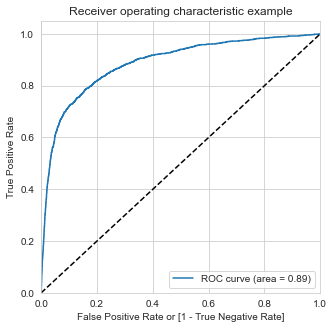

In [274]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

####  Optimal Cutoff Point

In [275]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.401573,65002,0,1,1,1,1,1,0,0,0,0,0
1,0,0.064869,67088,0,1,0,0,0,0,0,0,0,0,0
2,0,0.033619,36410,0,1,0,0,0,0,0,0,0,0,0
3,0,0.094358,90870,0,1,0,0,0,0,0,0,0,0,0
4,0,0.014871,50581,0,1,0,0,0,0,0,0,0,0,0


In [276]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.082857  1.000000  0.000000
0.1   0.1  0.822429  0.797701  0.824663
0.2   0.2  0.901429  0.689655  0.920561
0.3   0.3  0.923905  0.571264  0.955763
0.4   0.4  0.931143  0.395977  0.979491
0.5   0.5  0.926048  0.210920  0.990654
0.6   0.6  0.923571  0.121264  0.996054
0.7   0.7  0.920476  0.060920  0.998131
0.8   0.8  0.918857  0.028736  0.999273
0.9   0.9  0.918000  0.014368  0.999637


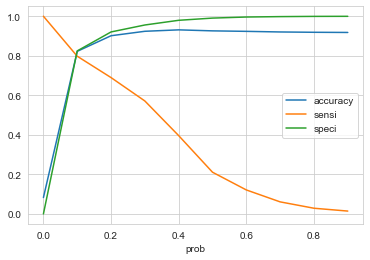

In [277]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [278]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.401573,65002,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.064869,67088,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.033619,36410,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.094358,90870,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.014871,50581,0,1,0,0,0,0,0,0,0,0,0,0


In [279]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19260
           1       0.67      0.21      0.32      1740

    accuracy                           0.93     21000
   macro avg       0.80      0.60      0.64     21000
weighted avg       0.91      0.93      0.91     21000



In [280]:
#The important features are 
vif['Features'].values

array(['count_rech_2g_8', 'arpu_6', 'sachet_2g_6', 'loc_ic_mou_6',
       'loc_og_mou_8', 'isd_og_mou_8', 'total_rech_num_8', 'fb_user_8',
       'loc_ic_mou_diff', 'offnet_mou_diff', 'last_day_rch_amt_8',
       'spl_ic_mou_8', 'sep_vbc_3g'], dtype=object)

**RF model performs very well when compared to LR model without PCA**